MasVnrType: Masonry veneer type

- BrkCmn:	Brick Common
- BrkFace:	Brick Face
- CBlock:	Cinder Block
- None:	None
- Stone:	Stone
	
MasVnrArea: Masonry veneer area in square feet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
PATH='../data/'
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')

col = ['MasVnrType', 'MasVnrArea']
col_train = ['MasVnrType', 'MasVnrArea', 'SalePrice']
col_train = train[col_train]
col_test = test[col]

# Stats

In [23]:
print("----train missing----")
print(col_train.isnull().sum())
print("----test missing----")
print(col_test.isnull().sum())

----train missing----
MasVnrType    8
MasVnrArea    8
SalePrice     0
dtype: int64
----test missing----
MasVnrType    16
MasVnrArea    15
dtype: int64


Maybe missing  values of MasVnrType should be None, let's check it out the rows where MasVnrType='None'

864
  MasVnrType  MasVnrArea  SalePrice
1       None         0.0     181500
3       None         0.0     140000
5       None         0.0     143000
8       None         0.0     129900
9       None         0.0     118000


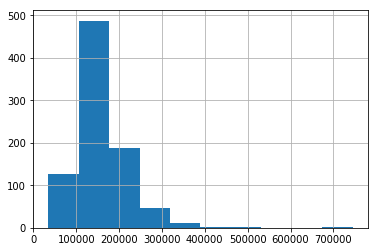

In [28]:
# MasVnrType == 'None'
print(len(col_train[col_train.MasVnrType=='None']))
print(col_train[col_train.MasVnrType=='None'].head())

# SalePrice distribution of houses where MasVnrType == None
col_train[col_train.MasVnrType=='None']['SalePrice'].hist()

In [25]:
# MasVnrArea isnull
print(len(col_train[col_train.MasVnrType.isnull()]))
col_train[col_train.MasVnrType.isnull()]

8


,MasVnrType,MasVnrArea,SalePrice
234,NaN,NaN,216500
529,NaN,NaN,200624
650,NaN,NaN,205950
936,NaN,NaN,184900
973,NaN,NaN,182000
977,NaN,NaN,199900
1243,NaN,NaN,465000
1278,NaN,NaN,237000


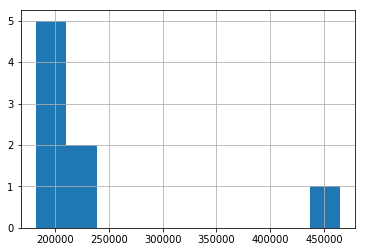

In [31]:
col_train[col_train.MasVnrType.isnull()]['SalePrice'].hist()

#### prices of the houses with no MasonVeneer mostly around 100k-300k, the houses wiht missing MasonVeneer also center aroudn 200k - 250k => I will impute missing 
- MasVnrType with 'None'
- MasVnrArea with 0.0